In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
type(iris)

pandas.core.frame.DataFrame

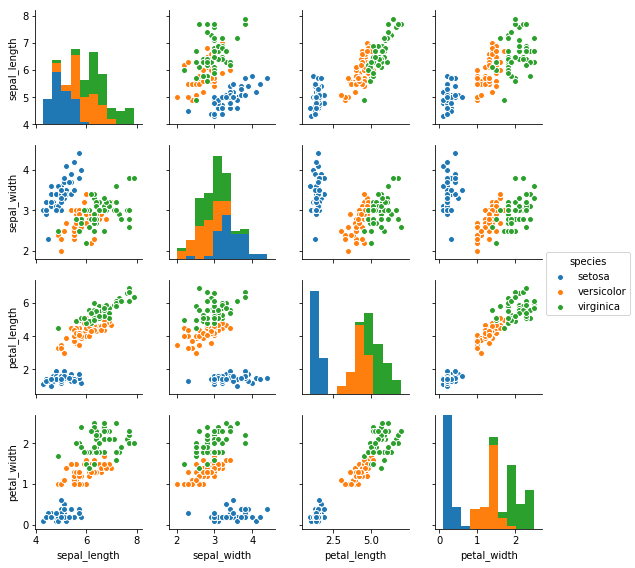

In [3]:
sns.pairplot(iris, hue='species', size=2)

In [4]:
X_iris = iris.drop('species', axis=1)

In [5]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y_iris = iris['species']

In [7]:
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

# Video Tutorial

## supervised leaning

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
house_price = [
    245, 312, 279, 308, 199, 219, 505, 324, 319, 255]
size = [
    14, 16, 17, 18.75, 11, 15.5, 23.5, 24.5, 14.25, 17]
size = np.array(size) # convert to np array
size_t = size.reshape((-1, 1)) # transpose

size_t

array([[14.  ],
       [16.  ],
       [17.  ],
       [18.75],
       [11.  ],
       [15.5 ],
       [23.5 ],
       [24.5 ],
       [14.25],
       [17.  ]])

In [9]:
regr = linear_model.LinearRegression()
regr.fit(size_t, house_price)

print("Coefs:\n", regr.coef_)
print("intercept:\n", regr.intercept_)


Coefs:
 [15.0174992]
intercept:
 38.94988864142539


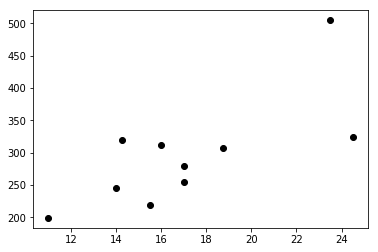

In [10]:
plt.plot(size_t, house_price, 'o', color='black') # price from size

In [11]:
# make predition
size_new = 11.2
# 1st method
price = regr.intercept_ + (size_new * regr.coef_)
print(price)
# 2nd method
price = regr.predict([[size_new]])
print(price)

[207.14587973]
[207.14587973]


In [12]:
def graph(formula, x_range):
    x = np.array(x_range)
    y = eval(formula)
    plt.plot(x,y)

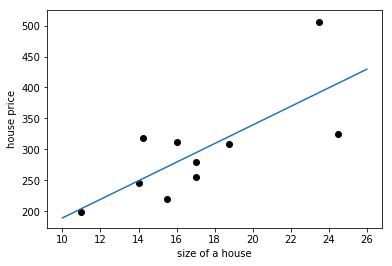

In [13]:
graph('regr.intercept_ + (x * regr.coef_)', range(10, 27))
plt.scatter(size, house_price, color='black')
plt.ylabel('house price')
plt.xlabel('size of a house')
plt.show()

## Unsupervised learning

1. Clustering
2. Assosiation

Clusteing: for analyzing and grouping data which doesn't have pre-labled class.
Algorithms:
- K-means
- Hierarchical Clustering
- Hidden Markov model

Association: discovers the probability of the co-occurence of items in a collection
Algorithms:
- Apriori algorithm
- FP-Growth

### K-means

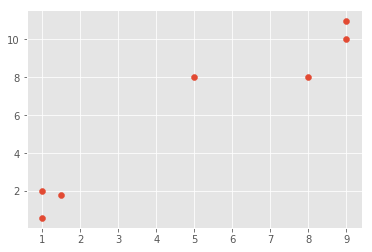

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
from sklearn.cluster import KMeans
x = [9,1,9,5,1.5,8,1]
y =[11,2,10,8,1.8,8,0.6]
plt.scatter(x,y)
plt.show()

In [15]:
X = np.array(list(zip(x,y)))

In [16]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_ # what class each point belongs to
print('centroid',centroids)
print('labels',labels)

centroid [[1.16666667 1.46666667]
 [7.75       9.25      ]]
labels [1 0 1 1 0 1 0]


coordinate: [ 9. 11.] 	label: 1
coordinate: [1. 2.] 	label: 0
coordinate: [ 9. 10.] 	label: 1
coordinate: [5. 8.] 	label: 1
coordinate: [1.5 1.8] 	label: 0
coordinate: [8. 8.] 	label: 1
coordinate: [1.  0.6] 	label: 0


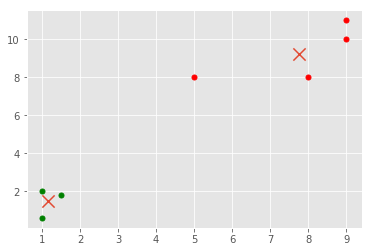

In [17]:
colors = ['g.','r.','c.','y.']
for i in range(len(X)):
    print('coordinate:', X[i], '\tlabel:', labels[i])
    plt.plot(X[i][0],X[i][1], colors[labels[i]], markersize=10)

plt.scatter(centroids[:, 0], centroids[:,1], marker='x', s=150, linewidths=5, zorder=10)
plt.show()    


### Association

People usually buy fries with sauce. Machine learns what should it favor.

In [18]:
%%bash
touch weather.csv
echo -e "Temperature Diff,Pressure Diff\n2,-3\n17,15" > weather.csv

In [19]:
%%bash
cat we*

Temperature Diff,Pressure Diff
2,-3
17,15


In [20]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

data = pd.read_csv('weather.csv')
data.shape
data.head()

,Temperature Diff,Pressure Diff
0,2,-3
1,17,15


In [21]:
f1 = data['Temperature Diff'].values
f2 = data['Pressure Diff'].values

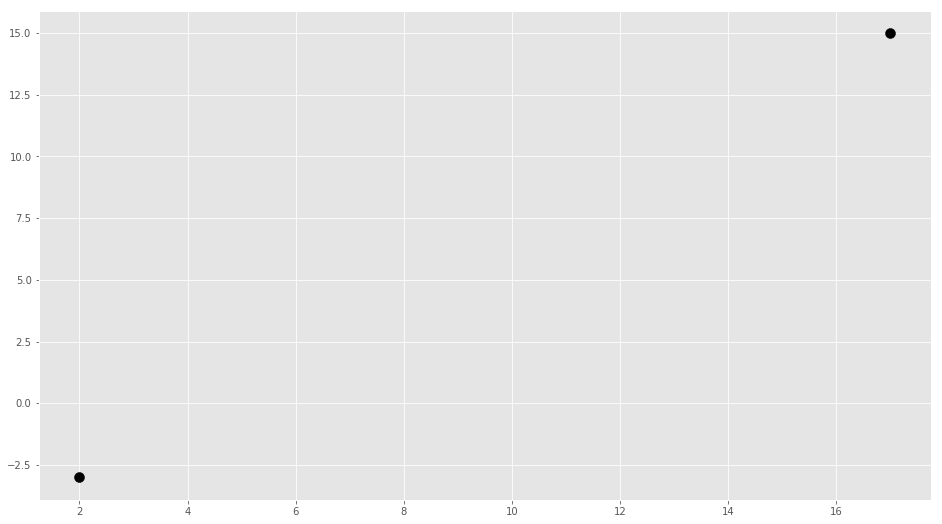

In [22]:
X = np.array(list(zip(f1,f2)))
plt.scatter(f1, f2, c='black',s=100)

In [23]:
data = pd.read_csv('CO2.csv')
data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2018,407.98,408.35,409.46,410.26,411.24,410.79,408.71,406.99,0.00,0.00,0.00,0.00
1,2017,406.13,406.42,407.18,409.00,409.65,408.84,407.07,405.07,403.38,403.64,405.14,406.82
2,2016,402.52,404.04,404.83,407.42,407.70,406.81,404.39,402.25,401.03,401.57,403.53,404.42
3,2015,399.98,400.28,401.54,403.28,403.96,402.80,401.31,398.93,397.63,398.29,400.16,401.85
4,2014,397.85,398.01,399.77,401.38,401.78,401.25,399.10,397.03,395.38,396.03,397.28,398.91


<class 'numpy.ndarray'>


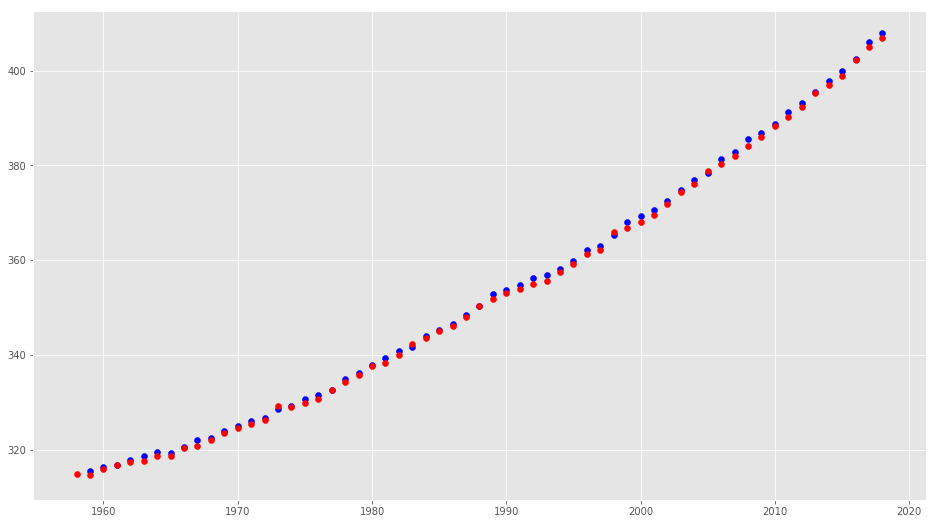

In [24]:
janCO2 = data['Jan'].values
year = data['Year'].values
my = np.stack((year,janCO2))

def filter(my):
    # filter out zeroes
    my_clean = np.array([])
    for x in my.T:
        if my_clean.size == 0:
            # maybe this can be done easier,
            # how to define an empty np array
            # of a given size
            my_clean = np.array([x])
            continue
        if x[1] == 0:
            continue
        my_clean = np.concatenate((my_clean, [x]), axis=0)
    return my_clean.T
 
# the same as list(zip(..))
plt.scatter(*filter(my), color='blue')

augCO2 = data['Aug'].values
print(type(augCO2))
year = data['Year'].values
janCO2 = data['Jan'].values
year = data['Year'].values
my = np.stack((year,augCO2))

plt.scatter(*filter(my), color='red')
plt.show()

In [25]:
X_data = data.drop('Year', axis=1)
X_data.head()
# guess a month??


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,407.98,408.35,409.46,410.26,411.24,410.79,408.71,406.99,0.00,0.00,0.00,0.00
1,406.13,406.42,407.18,409.00,409.65,408.84,407.07,405.07,403.38,403.64,405.14,406.82
2,402.52,404.04,404.83,407.42,407.70,406.81,404.39,402.25,401.03,401.57,403.53,404.42
3,399.98,400.28,401.54,403.28,403.96,402.80,401.31,398.93,397.63,398.29,400.16,401.85
4,397.85,398.01,399.77,401.38,401.78,401.25,399.10,397.03,395.38,396.03,397.28,398.91


0.3236180978529519


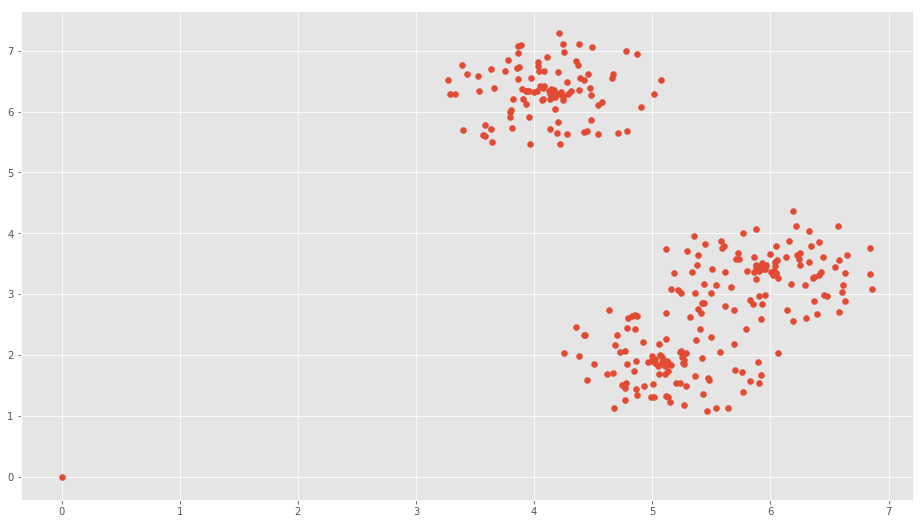

In [115]:
from math import sin, cos, pi
from random import random
print(random())
data = np.array([[0,0]])
clust_num = 3
for n in range(clust_num):
    a, b = 7 * random(), 7 * random()
    for i in range(100):
        r = random()
        fi = random()
        data = np.concatenate((data, [[a + r*cos(fi*2*pi), b + r*sin(fi*2*pi)]]))

plt.scatter(*data.T)

          x         y
0  0.000000  0.000000
1  5.080607  1.969678
2  5.113828  1.869652
3  5.536682  1.139557
4  4.855112  2.665513
          x         y
1  5.080607  1.969678
2  5.113828  1.869652
3  5.536682  1.139557
4  4.855112  2.665513
5  5.700814  1.759358
      x     y
1  5.08  1.97
2  5.11  1.87
3  5.54  1.14
4  4.86  2.67
5  5.70  1.76


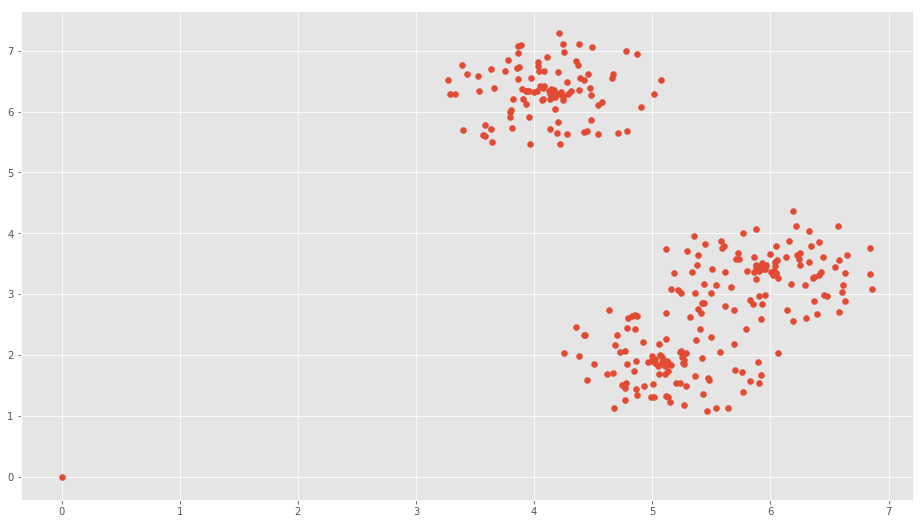

In [116]:
plt.scatter(*data.T)

a = np.array([5, 6, 7, 8])
df = pd.DataFrame({'x': data.T[0], 'y': data.T[1]})
print(df.head())
df = df.drop(0, axis=0)
print(df.head())
df = df.round(2)
print(df.head())

In [117]:
df.to_csv('Tree Clusters.csv', sep='\t', encoding='utf-8')

In [118]:
%%bash
cat Tre*

	x	y
1	5.08	1.97
2	5.11	1.87
3	5.54	1.14
4	4.86	2.67
5	5.7	1.76
6	5.13	1.32
7	4.77	2.07
8	4.25	2.03
9	5.06	1.69
10	5.43	1.96
11	5.43	1.37
12	5.27	1.19
13	5.7	2.18
14	4.87	1.35
15	4.45	1.6
16	5.23	1.54
17	4.79	2.61
18	4.67	1.71
19	4.42	2.33
20	5.89	1.88
21	4.69	2.17
22	5.0	1.98
23	5.4	2.43
24	5.26	1.88
25	4.85	2.42
26	4.99	1.31
27	5.05	1.82
28	5.27	1.93
29	5.77	1.4
30	5.12	2.69
31	5.28	1.49
32	5.11	1.83
33	5.13	1.9
34	5.06	2.18
35	5.48	1.59
36	5.24	2.06
37	5.21	1.54
38	5.92	1.67
39	5.1	1.7
40	4.96	1.88
41	4.7	2.33
42	4.87	1.45
43	5.09	1.86
44	5.16	1.83
45	4.77	1.26
46	5.36	1.67
47	4.75	1.51
48	5.12	1.34
49	5.11	2.26
50	5.24	2.06
51	4.63	2.74
52	5.47	1.63
53	5.25	1.98
54	4.83	2.64
55	5.27	1.86
56	5.14	1.86
57	4.38	1.98
58	5.02	1.32
59	5.39	2.76
60	4.85	1.73
61	4.87	2.64
62	4.92	2.22
63	4.99	1.9
64	5.83	1.59
65	5.5	2.29
66	5.41	2.7
67	5.02	1.88
68	4.51	1.86
69	5.76	1.73
70	4.79	1.86
71	5.64	1.14
72	5.47	1.08
73	5.06	2.0
74	5.11	1.86
75	4.86	1.91
76	4.62	1.69
77	4.36	2.46
78	4.78	2.45
79	5

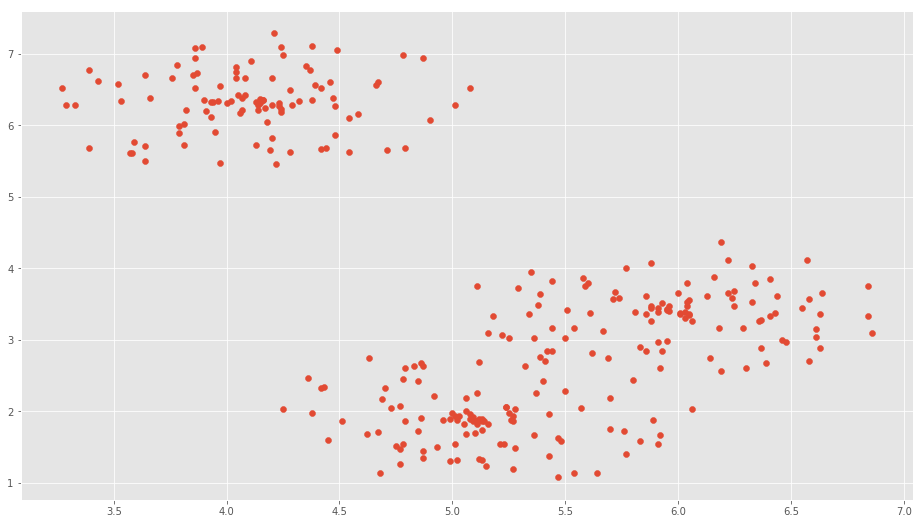

In [119]:
xval = df['x'].values
yval = df['y'].values
plt.scatter(xval, yval)

(2, 300)
(300, 2)
[[5.08 1.97]
 [5.11 1.87]
 [5.54 1.14]
 [4.86 2.67]
 [5.7  1.76]
 [5.13 1.32]
 [4.77 2.07]
 [4.25 2.03]
 [5.06 1.69]
 [5.43 1.96]
 [5.43 1.37]
 [5.27 1.19]
 [5.7  2.18]
 [4.87 1.35]
 [4.45 1.6 ]
 [5.23 1.54]
 [4.79 2.61]
 [4.67 1.71]
 [4.42 2.33]
 [5.89 1.88]
 [4.69 2.17]
 [5.   1.98]
 [5.4  2.43]
 [5.26 1.88]
 [4.85 2.42]
 [4.99 1.31]
 [5.05 1.82]
 [5.27 1.93]
 [5.77 1.4 ]
 [5.12 2.69]
 [5.28 1.49]
 [5.11 1.83]
 [5.13 1.9 ]
 [5.06 2.18]
 [5.48 1.59]
 [5.24 2.06]
 [5.21 1.54]
 [5.92 1.67]
 [5.1  1.7 ]
 [4.96 1.88]
 [4.7  2.33]
 [4.87 1.45]
 [5.09 1.86]
 [5.16 1.83]
 [4.77 1.26]
 [5.36 1.67]
 [4.75 1.51]
 [5.12 1.34]
 [5.11 2.26]
 [5.24 2.06]
 [4.63 2.74]
 [5.47 1.63]
 [5.25 1.98]
 [4.83 2.64]
 [5.27 1.86]
 [5.14 1.86]
 [4.38 1.98]
 [5.02 1.32]
 [5.39 2.76]
 [4.85 1.73]
 [4.87 2.64]
 [4.92 2.22]
 [4.99 1.9 ]
 [5.83 1.59]
 [5.5  2.29]
 [5.41 2.7 ]
 [5.02 1.88]
 [4.51 1.86]
 [5.76 1.73]
 [4.79 1.86]
 [5.64 1.14]
 [5.47 1.08]
 [5.06 2.  ]
 [5.11 1.86]
 [4.86 1.91]
 [4.62 

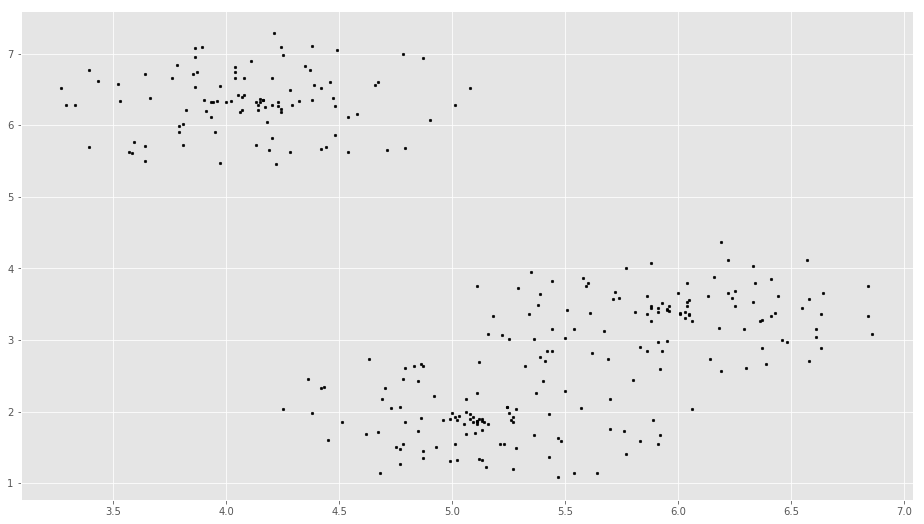

In [120]:
X = np.stack((xval,yval))
print(X.shape) # (2, 500)
# or
X = np.array(list(zip(xval,yval)))
print(X.shape) # (500, 2)

print(X)
plt.scatter(*X.T, c='black', s=7)

In [121]:
def dist(a, b, ax=1):
    # if ax == None, it calculates euclidian norm of a matrix
    return np.linalg.norm(a-b, axis=ax)

print(dist(np.array([0,0]), np.array([1,1]), 0))

1.4142135623730951


In [122]:
matr = np.array([[1,3],[-2,4],[4,-6]])
np.min(matr[:,0]), np.min(matr[:,1])

(-2, -6)

In [123]:
k = 5 # number of clusters

C_x = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size=k)
C_y = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
# generated k random points
print(C)

[[3. 5.]
 [5. 3.]
 [4. 5.]
 [3. 2.]
 [5. 5.]]


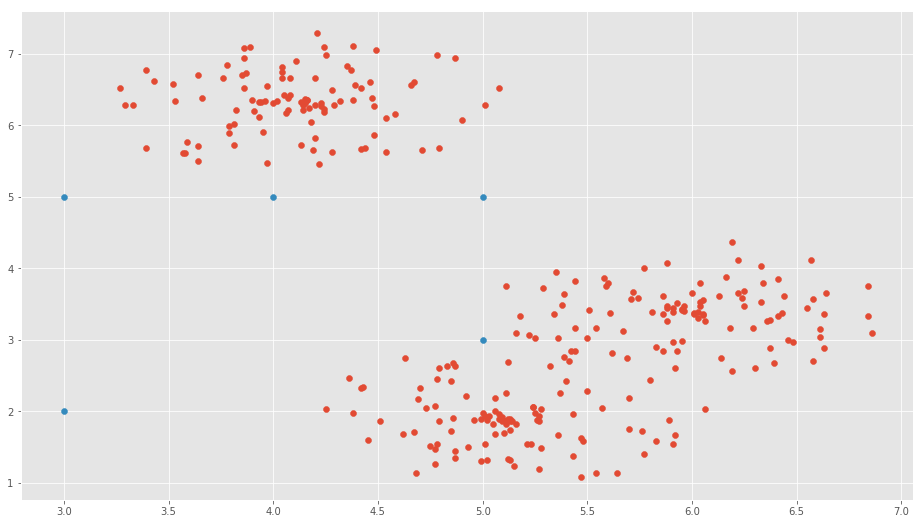

In [124]:
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
plt.scatter(*X.T)
plt.scatter(*C.T)

Distance between (matrices) [[3. 5.]
 [5. 3.]
 [4. 5.]
 [3. 2.]
 [5. 5.]] and [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 13.114877048604
Number of points in 0 cluster 6
Number of points in 1 cluster 194
Number of points in 2 cluster 82
Number of points in 3 cluster 1
Number of points in 4 cluster 17
2.867212
Number of points in 0 cluster 15
Number of points in 1 cluster 152
Number of points in 2 cluster 79
Number of points in 3 cluster 47
Number of points in 4 cluster 7
0.7552617
Number of points in 0 cluster 22
Number of points in 1 cluster 114
Number of points in 2 cluster 67
Number of points in 3 cluster 86
Number of points in 4 cluster 11
0.6240245
Number of points in 0 cluster 23
Number of points in 1 cluster 103
Number of points in 2 cluster 61
Number of points in 3 cluster 97
Number of points in 4 cluster 16
0.1823621
Number of points in 0 cluster 23
Number of points in 1 cluster 102
Number of points in 2 cluster 60
Number of points in 3 cluster 98
Number of points in 4 clust

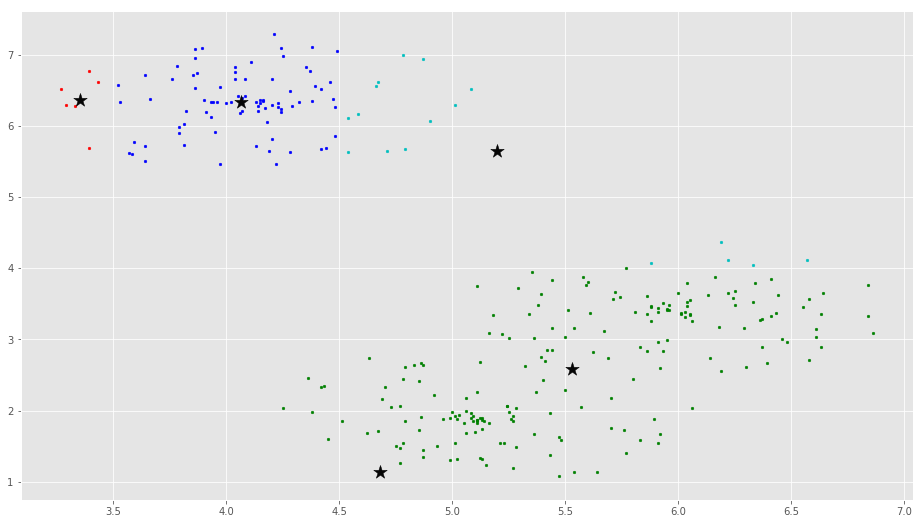

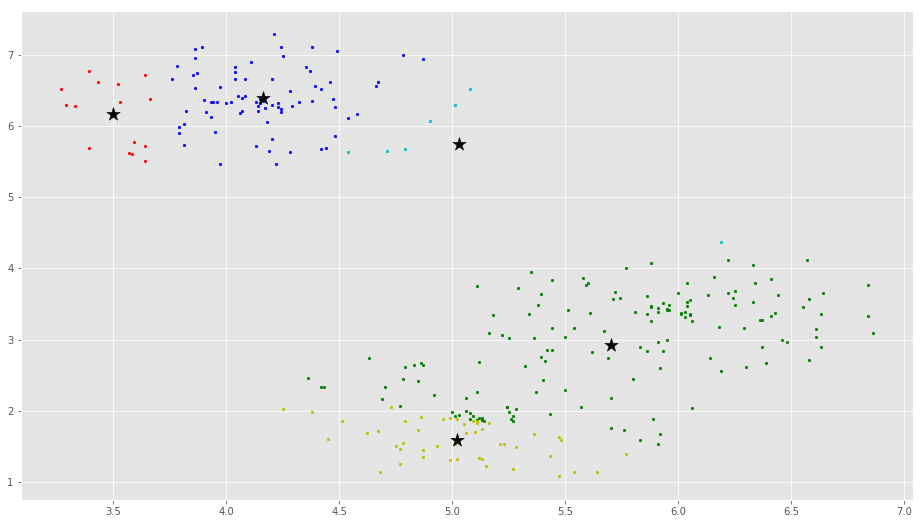

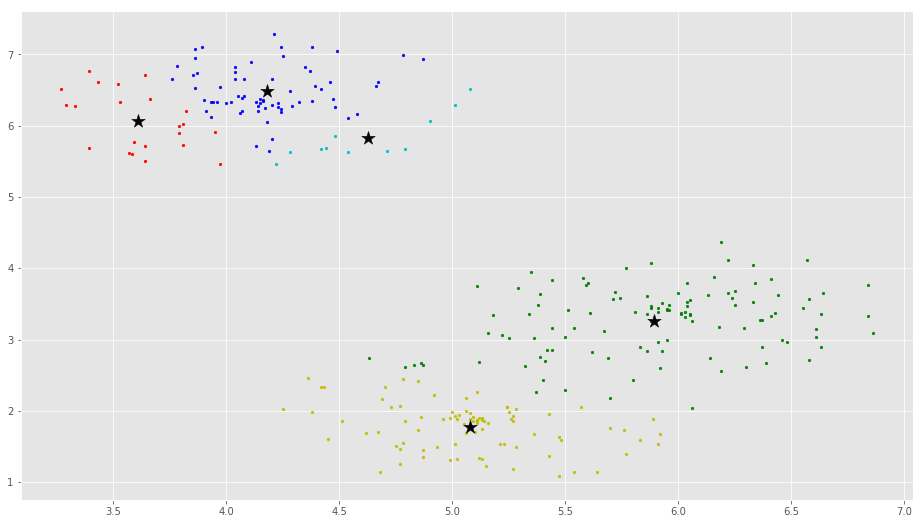

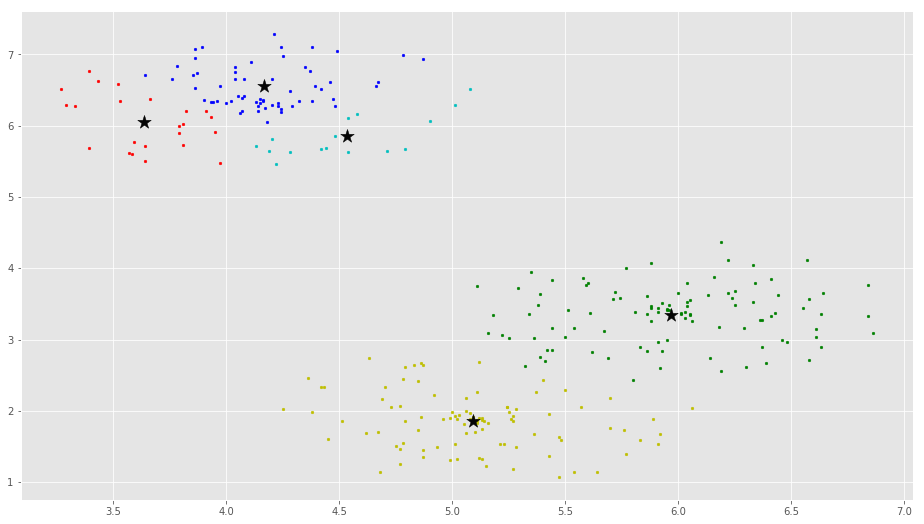

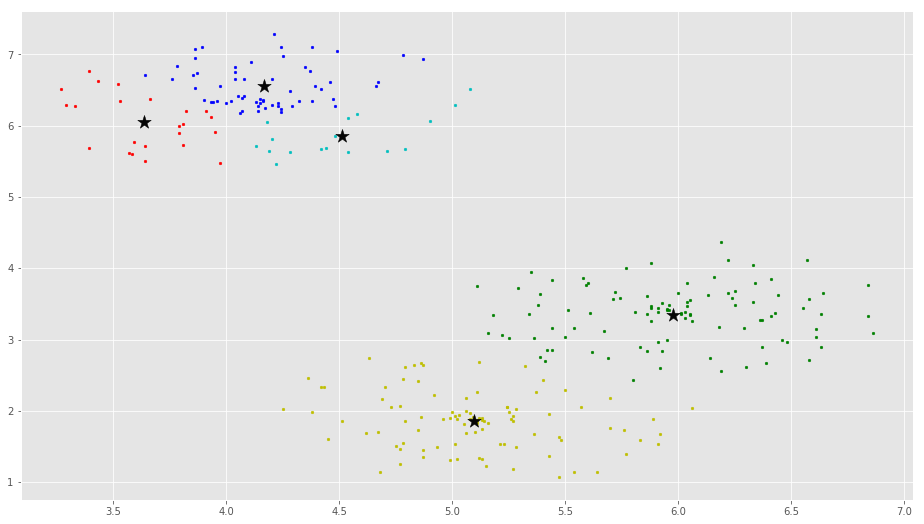

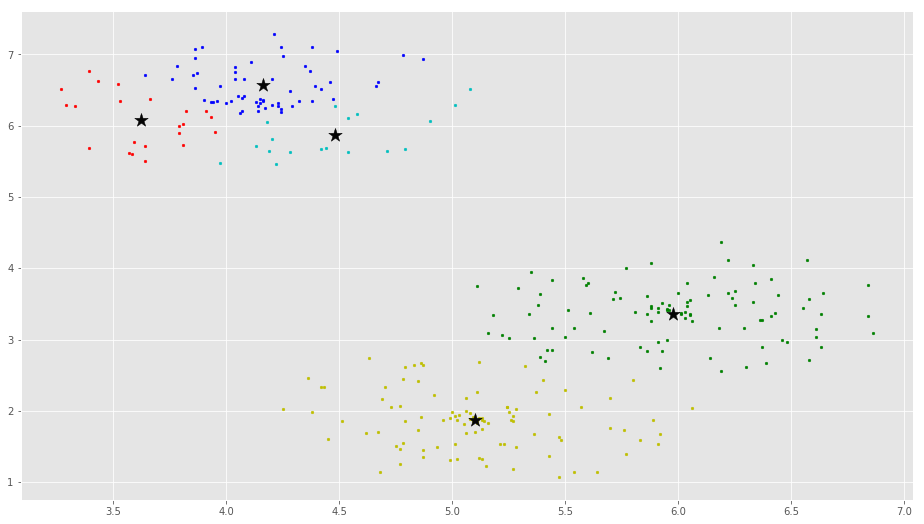

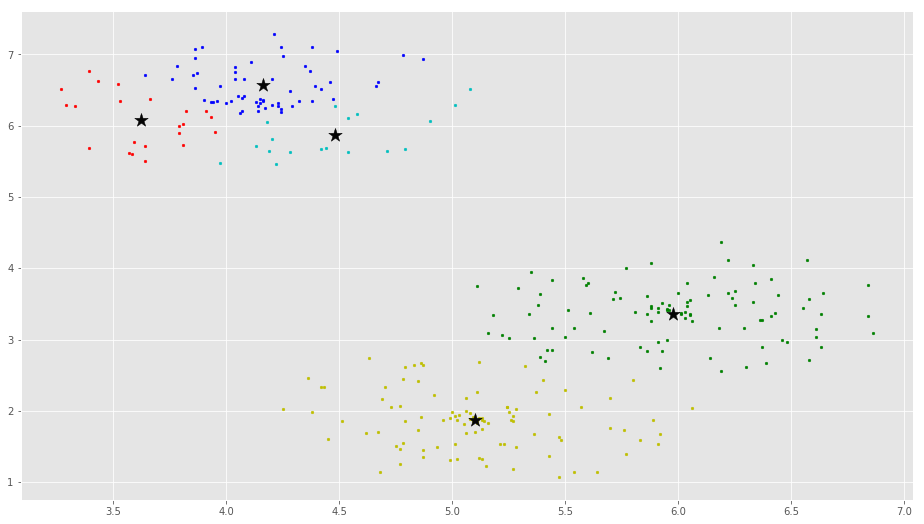

In [125]:
from time import sleep

C_old = np.zeros(C.shape)

# cluster labels for elements (consist of 0 1 2)
clusters = np.zeros(len(X))
error = dist(C, C_old, None)

print('Distance between (matrices)', C, 'and', C_old, error)
fig_num = 1
while error != 0:
    for i in range(len(X)):
        # X[i] = np.array([2,5]), C = np.array([[3,4], [4,-2], ...etc])
        distances = dist(X[i],C) # an array of k elements
        cluster = np.argmin(distances)
        # print(cluster) # 0 1 or 2,
        # depending on what elem of C is the nearest to X[i]
        clusters[i] = cluster
    
    C_old = deepcopy(C)
    
    # redefine cluster center points - is in the middle of previous cluster
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        print('Number of points in {} cluster'.format(i), len(points))
        C[i] = np.mean(points, axis=0)

    error = dist(C, C_old, None)
    print(error)

    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    plt.figure(fig_num)
    fig_num += 1
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        plt.scatter(*points.T, s=7, c=colors[i])
    plt.scatter(*C.T, marker='*', s=200, c='#050505')


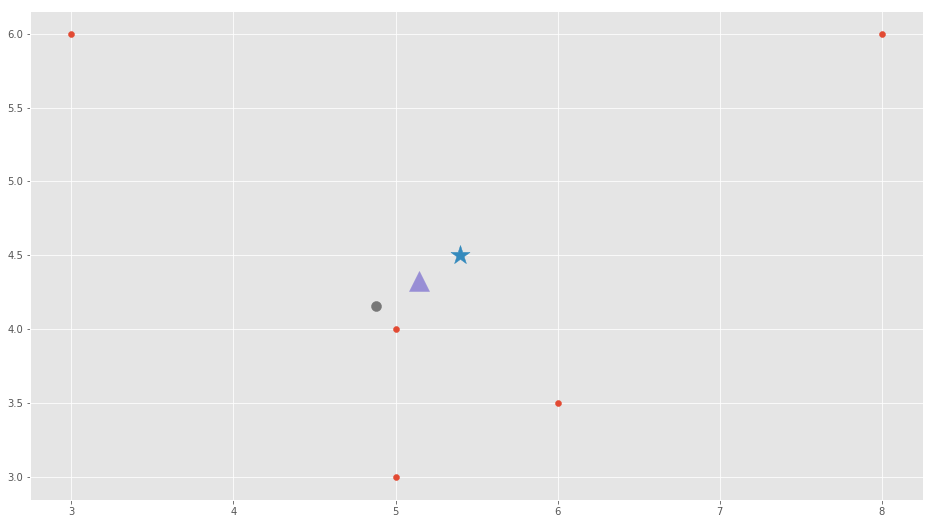

In [89]:
arr = np.array([[3,6],[5,3],[8,6],[5,4],[6,3.5]])
plt.scatter(*arr.T)

C_mean = np.mean(arr, axis=0)
plt.scatter(*C_mean.T, marker='*', s=400)
import scipy

C_gmean = scipy.stats.mstats.gmean(arr, axis=0)
plt.scatter(*C_gmean.T, marker='^', s=400)

C_hmean = scipy.stats.mstats.hmean(arr, axis=0)
plt.scatter(*C_hmean.T, marker='.', s=400)